<a href="https://colab.research.google.com/github/varshahaswani/Hotel-Booking-Analysis/blob/main/Varsha_Haswani_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
%matplotlib inline

In [ ]:
# import dataset

df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/DataSets/Hotel Bookings.csv')

In [ ]:
# Understand the data

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

# **Performing Data Preprocessing**

In [ ]:
# copying the dataset, so that our original dataset remains same

hotel_data = df.copy()

# 1. Dealing With Mising Values
Check if our data contains any missing values

In [ ]:
hotel_data.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

# I have 4 columns with missing values.
1. For company and agent there are id_numbers associated with them, so all the null values I can replace it by 0
2. For children column I can replace it with rounded mean values.
3. For country there are special country codes for each country, as it is a categorical data I can replace the null values by mode value.

In [ ]:
# for company and agent 
hotel_data[['company','agent']] = hotel_data[['company','agent']].fillna(0.0)

In [ ]:
# for children column
hotel_data['children'].fillna(round(df.children.mean()), inplace = True)

In [ ]:
# for country column
hotel_data['country'].fillna(df.country.mode().to_string(), inplace=True)

# 2. Handling Outliers

In [ ]:
# I will remove all the rows that have zero guests including adults, babies or children. 

hotel_data[(hotel_data.children + hotel_data.adults + hotel_data.babies)==0].shape

(180, 32)

In [ ]:
hotel_data = hotel_data.drop(hotel_data[(hotel_data.children + hotel_data.adults + hotel_data.babies)==0].index)

In [ ]:
#Meal type Undefined/SC combined

hotel_data.replace('Undefined','SC',inplace=True)

# 3. Converting Datatypes

In [ ]:
# Let me check the datatypes of our dataset
hotel_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
# I have columns withe data type float but values are integer, so I will convert them into integer type

hotel_data[['children','agent','company']] = hotel_data[['children','agent','company']].astype('int64')

# Now we have our data with zero null values

In [ ]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_week_nights            119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

# Let's start Data Visualization 



**<h4>1. Room information analysis</h4>**

In [ ]:
# checking the relationship between hotel type and cancellation
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


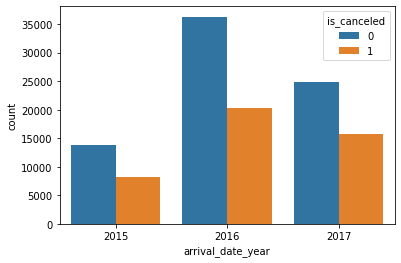

In [ ]:
sns.countplot(x=hotel_data['arrival_date_year'],hue=hotel_data['is_canceled'])

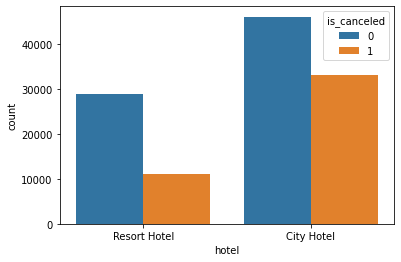

In [ ]:
sns.countplot(x=hotel_data['hotel'],hue=hotel_data['is_canceled'])

Here from the graphs it seems that the order volume of city hotels exceeds than that of resort hotels, but at the same time the possibility of booking cancellation of city hotels is much higher than that of resort hotels.

**<h4>2. Check the relationship between room type and cancellation</h4>**





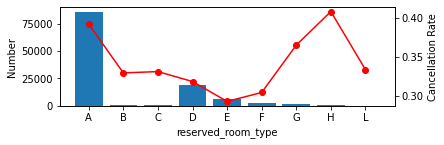

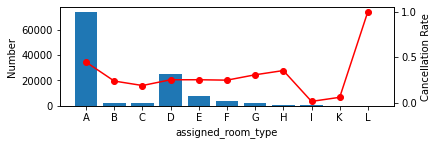

In [ ]:
index = 1
for roomtype in ['reserved_room_type','assigned_room_type']:
  axis1 = plt.subplot(2,1,index)
  index+=1
  axis2 = axis1.twinx()  # this function creates a twin axes sharing the xaxis
  axis1.bar(
      hotel_data.groupby(roomtype).size().index,
      hotel_data.groupby(roomtype).size())
  axis1.set_xlabel(roomtype)
  axis1.set_ylabel('Number')

  axis2.plot(hotel_data.groupby(roomtype)['is_canceled'].mean(),'ro-')
  axis2.set_ylabel('Cancellation Rate')
  plt.show()

The above plot shows that the most of the room types are reserved and allocated are in four categories A/D/E/F, from these the cancellation rate of category A is higher than the other three categories, which requires more attention.

**<h4>3. The Effect of Room type changes on cancellation</h4>**



In [ ]:
hotel_data['room_changed'] = hotel_data['reserved_room_type'] != hotel_data['assigned_room_type']
hotel_data['room_changed']

0         False
1         False
2          True
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: room_changed, Length: 119210, dtype: bool

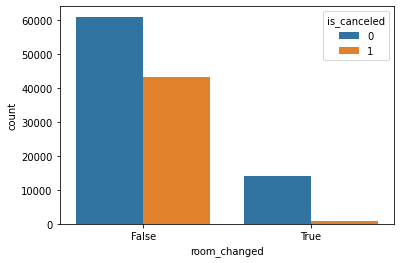

In [ ]:
sns.countplot(x=hotel_data['room_changed'],hue=hotel_data['is_canceled'])

Customers who have changed the room type are less likely to cancel their reservations than those who have not changed.

The guessed reason may be:
- The customer is not satisfied with the room type, but in order to ensure normal check-in, they choose to change the room type instead of canceling the reservation, so the probability of cancellation is low

**<h4> 4.Customer Information Analysis</h4>**

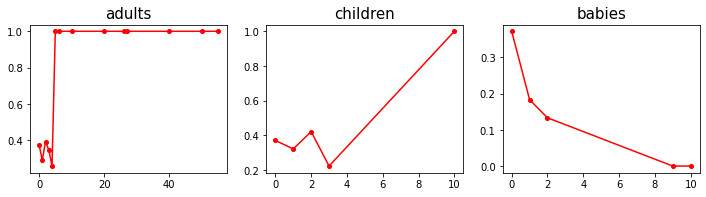

In [ ]:
plt.figure(figsize=(12,6))
index = 0 
for people in ['adults', 'children', 'babies']:
  index +=1
  plt.subplot(2,3,index)
  plt.plot(hotel_data.groupby(people)['is_canceled'].mean(),'ro-',ms=4)
  plt.title(people, fontsize=15)


From about visualization we can see that the booking canelation rate dropped sharply when there is a baby.

Also, most bookings do not have children and infants, and single occupancy and double occupancy are the main number of reservations

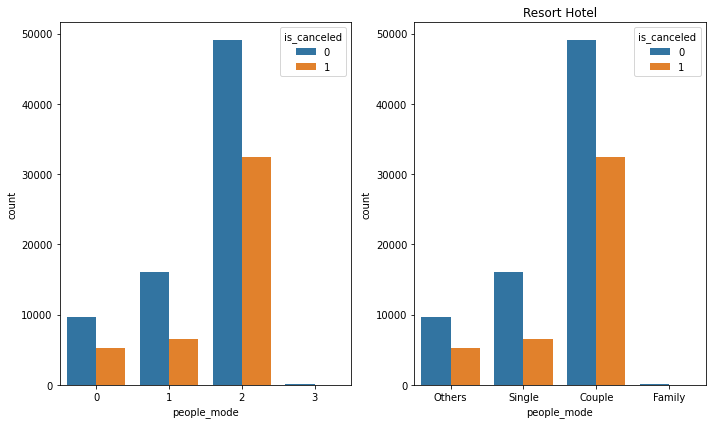

In [ ]:
# Analysis of number of occupants

# individual
single = (hotel_data.adults==1) & (hotel_data.children==0) & (hotel_data.babies==0)

#couple
couple = (hotel_data.adults==2) & (hotel_data.children==0) & (hotel_data.babies==0)

#family
family = (hotel_data.adults>=2) & (hotel_data.children>0) & (hotel_data.babies>0)

hotel_data['people_mode'] = single.astype(int)*1 + couple.astype(int)*2 + family.astype(int)*3
plt.figure(figsize=(10,6))
index=1
for hotel_type in ['City Hotel', 'Resort Hotel']:
  plt.subplot(1,2,index)
  index+=1
  sns.countplot(x=hotel_data['people_mode'],
                hue = hotel_data['is_canceled'],
                data = hotel_data[hotel_data.hotel == hotel_type])
plt.xticks([0,1,2,3],['Others','Single','Couple','Family'])
plt.title(hotel_type)
plt.tight_layout()
plt.show()


For city hotels, the cancellation probability: double >> single ≈ family, pay attention to the high cancellation rate of double occupancy customers, and improve the hotel's supporting services for double occupancy customers to reduce the cancellation rate

For resort hotels, the probability of cancellation: family>double>single, the hotel can provide corresponding discounts for family customers to increase the occupancy rate of family customers.

**<h4>5. Types of Meals</h4>**

In [ ]:
hotel_data[hotel_data['is_canceled']==1].meal.value_counts()

BB    34506
HB     4983
SC     4232
FB      478
Name: meal, dtype: int64

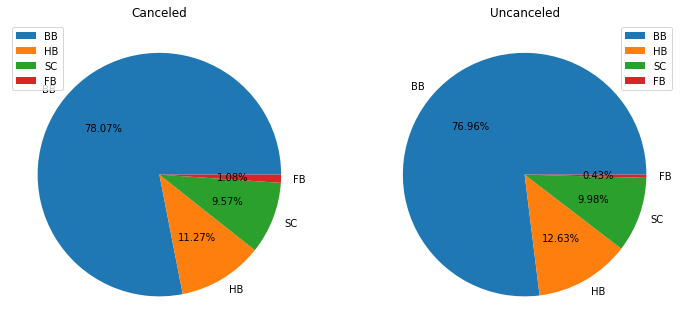

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)

labels = hotel_data[hotel_data['is_canceled']==1].meal.value_counts().index
plt.pie(hotel_data[hotel_data['is_canceled']==1].meal.value_counts(), 
        labels=labels, 
        autopct="%.2f%%")   # autopct is to get values of pie section
plt.title('Canceled')
plt.legend(loc=2)
plt.subplot(122)

labels2 = hotel_data[hotel_data['is_canceled']==0].meal.value_counts().index
plt.pie(hotel_data[hotel_data['is_canceled']==0].meal.value_counts(), 
        labels=labels2, 
        autopct="%.2f%%") 
plt.title('Uncanceled')
plt.legend(loc=1)


Guests particularly like BB type of meals, followed by HB and SC. It is recommended that hotel owner can purchase HB and SC activities in the BB category to promote guest consumption 

Regardless of whether the reservation is cancelled or not, there is little difference between meal types

**<h4>6.Analysing Country/Region</h4>**

In [ ]:
country_df = pd.DataFrame(hotel_data.loc[hotel_data['is_canceled']==0]['country'].value_counts())
country_df

,country
PRT,20977
GBR,9668
FRA,8468
ESP,6383
DEU,6067
...,...
BHR,1
DJI,1
MLI,1
NPL,1


In [ ]:
#Find the number of customers in different countries
country_df.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_df["Number of Guests"].sum()
country_df['%_no_of_guests']=round(country_df['Number of Guests']/total_guests*100,2)
country_df['country']=country_df.index

In [ ]:
fig=px.pie(country_df,
           values='Number of Guests',
           names='country',
           title="Home country of guests",
           template="seaborn"
           )
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()

As can be seen from the figure, customers are mainly from Portugal, the United Kingdom, France, Spain and other European countries. The gap in the cancellation rate between different countries is very significant. The countries with higher cancellation rates include Portugal, Italy, Brazil, China, and Russia, which are developing Country-based.

**<h4> 7. Customer booking history</h4>**

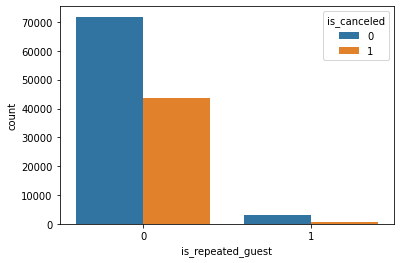

In [ ]:
sns.countplot(x=hotel_data['is_repeated_guest'],hue=hotel_data['is_canceled'])

Customer reservation history refers to the customer’s previous reservations, which reflects the customer’s integrity to a certain extent and reflects the current customer’s wishes

Most reservations come from new customers. The cancellation probability of returning customers is much lower than that of new customers

It is recommended to increase the training of new customers and increase the repurchase of hotels, such as maintaining the best price; giving some member rights on the order payment page; continuously distributing coupons to new customers, especially during holidays or local tourist seasons

**<h4>8. Order Cancellation Analysis</h4>**

In [ ]:
# Calculating the cancellation rate

total_cancellation = hotel_data['is_canceled'].sum()

resort_cancellation = hotel_data.loc[hotel_data['hotel']=='Resort Hotel']['is_canceled'].sum()
city_cancellation = hotel_data.loc[hotel_data['hotel']=='City Hotel']['is_canceled'].sum()

cancellation_percent = total_cancellation/hotel_data.shape[0]*100
resort_cancel_percent = resort_cancellation/hotel_data.shape[0]*100
city_cancel_percent = city_cancellation/hotel_data.shape[0]*100

print(f"Total bookings canceled: {total_cancellation:,} ({cancellation_percent:.0f} %)")
print(f"Resort hotel bookings canceled: {resort_cancellation:,} ({resort_cancel_percent:.0f} %)")
print(f"City hotel bookings canceled: {city_cancellation:,} ({city_cancel_percent:.0f} %)")

Total bookings canceled: 44,199 (37 %)
Resort hotel bookings canceled: 11,120 (9 %)
City hotel bookings canceled: 33,079 (28 %)


The cancellation rate of city hotel reservations is higher than that of resort hotels, mainly because the main user group of city hotels is business travel users, which are often urgent and unplanned. Hotel reservations are easy without planning and in-depth understanding of the state of the hotel. Blindly book and unsubscribe, so the unsubscribe rate is high. It is recommended to add the "Nearby Preferred" function to the channel platform, and automatically filter and recommend nearby cities with high occupancy rates, high re-occupation rates, high evaluations and other high-quality feedback by entering addresses. City hotels, on the one hand, can provide users with more efficient and convenient recommendation services, and on the other hand, they can also promote platform channels to optimize service content.

**<h4> 9. Book in Advance Analysis</h4>**

Text(0, 0.5, 'Cancellation Rate')

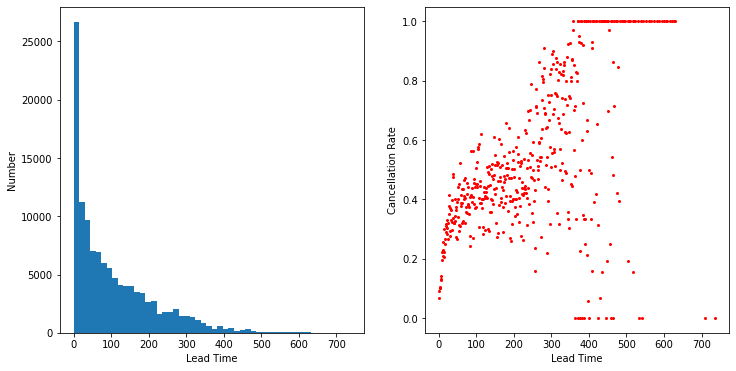

In [ ]:
# distribution of pre-booked duration

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.hist(hotel_data['lead_time'],bins=50)
plt.xlabel('Lead Time')
plt.ylabel('Number')

# The effect of booking in advance on cancellation

plt.subplot(122)
plt.plot(hotel_data.groupby('lead_time')['is_canceled'].mean().index,
         hotel_data.groupby('lead_time')['is_canceled'].mean(),
         'ro',
         markersize=2)
plt.xlabel('Lead Time')
plt.ylabel('Cancellation Rate')

Customers mainly tend to choose a time close to the check-in time.

As the booking advance time increases, the cancellation rate presents an upward trend.

The longer the advance booking time, the more variable factors and the higher the cancellation rate.

**<h4>10. Month of Stay</h4>**


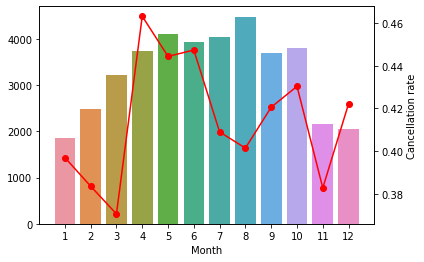

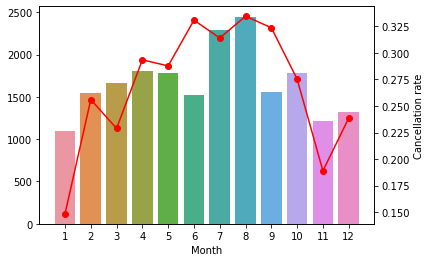

In [ ]:
# Generate the sorted list of months
months=['January','February','March','April','May','June','July','August','September','October','November','December']
for hotel in ['City Hotel','Resort Hotel']:
  fig, ax1=plt.subplots()
  ax2=ax1.twinx()
  hotel_df = hotel_data[hotel_data.hotel==hotel]
  monthly = hotel_df.groupby('arrival_date_month').size()
  monthly /=2
  monthly.loc[['July','August']]
  sns.barplot(x=list(range(1,13)), y=monthly[months],
             ax=ax1,)
  ax2.plot(range(12), hotel_df.groupby('arrival_date_month')['is_canceled'].mean()[months].values,'ro-')
  ax1.set_xlabel('Month')
  ax2.set_ylabel('Cancellation rate')


In terms of booking volume, city hotels saw a sharp decline in July/August, while resort hotels changed little over the same period. Overall, the monthly passenger flow of resort hotels changed a little.

In terms of cancellation rate, the cancellation rate of the two hotels in winter is relatively low. The cancellation rate of city hotels in summer is lower, but resort hotels are at a peak.

**<h4> 11. Other Factors </h4>**

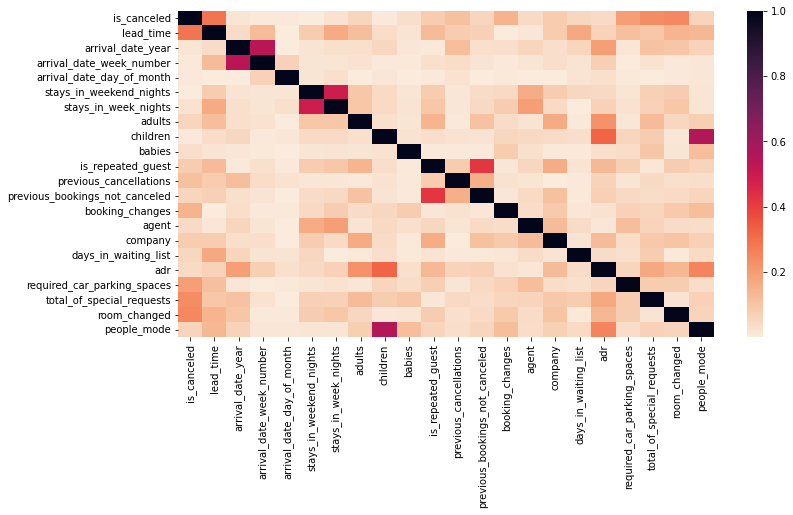

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(hotel_data.corr().abs(),cmap=sns.cm.rocket_r)

There are five factors which have a strong correlation with the cancellation rate:
1. lead_time: the number of days booked in advance
2. total_of_special_requests: the number of special requests made by customers
3. required_car_parking_spaces: the number of parking spaces required by the customer 
4. booking_changes: the number of changes/modifications made to the booking
5. room_changed: room type changed


